In [1]:
!python -m pip install --user --upgrade pip
!pip install --user keras
!pip install --user tensorflow
!pip install --user -U numpy

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\5c\2e\7e\a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\ee\98\38\46cbcc5a93cfea5492d19c38562691ddb23b940176c14f7b48
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Stored in directory: C:\Users\mayingzh\AppData\Local\pip\Cache\wheels\d7\de\2e\efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd
Successfully built gast absl-py termcolor wrapt


ERROR: tensorboard 1.14.0 has requirement setuptools>=41.0.0, but you'll have setuptools 39.1.0 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Requirement already up-to-date: numpy in c:\users\mayingzh\appdata\roaming\python\python36\site-packages (1.16.4)


In [3]:
# Use CPU only
# Only Macbook needs to run this cell
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
import matplotlib.pyplot as plt

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load data and do data normalization

In [2]:
df = pd.read_csv('Options.csv')
df.head()

,ticker,date,exdate,maturity,strike_price,best_offer,impl_volatility,underlying_price,interest_rate,cp_flag_C,cp_flag_P
0,AXP,2013-01-02,2013-01-04,2,60.0,0.03,0.181376,58.75,0.0008,1,0
1,AXP,2013-01-02,2013-01-04,2,62.5,0.05,0.450289,58.75,0.0008,1,0
2,AXP,2013-01-02,2013-01-04,2,65.0,0.05,0.676564,58.75,0.0008,1,0
3,AXP,2013-01-02,2013-01-04,2,67.5,0.50,1.369425,58.75,0.0008,1,0
4,AXP,2013-01-02,2013-01-04,2,70.0,0.01,0.888123,58.75,0.0008,1,0


In [3]:
df = df[df['interest_rate'].notnull()]

In [4]:
y = df['best_offer'].values
X = df[['maturity', 'strike_price', 'impl_volatility', 'underlying_price', 'cp_flag_C', 'cp_flag_P', 'interest_rate']]

In [5]:
# Normalize the data to build a regression neural network model
#sc= preprocessing.MinMaxScaler()
#X= sc.fit_transform(X)
X = preprocessing.normalize(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)

(1559488, 7)
(1559488,)


In [8]:
XX_train, XX_validation, yy_train, yy_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Build a keras Sequential model

In [9]:
# Built Keras sequential model with 3 hidden layer, and after the first hidden layer.
model = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])

W0705 21:05:21.055255 10472 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 21:05:21.071266 10472 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 21:05:21.077271 10472 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [10]:
# Enable early stopping based on the loss of validation data
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=25)

In [11]:
# Because it is a simple regression problem, we should custom metrics function
from keras import backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis = -1))

def r_square(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [12]:
# use mean_squared_error to compile regression model loss
model.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)

W0705 21:05:31.662904 10472 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [13]:
# fit the model
result = model.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation),
                   callbacks = [es]
                  )

W0705 21:05:40.826040 10472 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0705 21:05:40.982231 10472 deprecation_wrapper.py:119] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 1247590 samples, validate on 311898 samples
Epoch 1/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 74.4599 - rmse: 4.4000 - r_square: 0.6299 - val_loss: 7.1266 - val_rmse: 1.4774 - val_r_square: 0.9638
Epoch 2/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 4.3325 - rmse: 1.1099 - r_square: 0.9780 - val_loss: 3.0192 - val_rmse: 0.9518 - val_r_square: 0.9848
Epoch 3/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 2.1587 - rmse: 0.7984 - r_square: 0.9890 - val_loss: 1.2478 - val_rmse: 0.6063 - val_r_square: 0.9937
Epoch 4/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.6375 - rmse: 0.6992 - r_square: 0.9917 - val_loss: 0.8913 - val_rmse: 0.5652 - val_r_square: 0.9955
Epoch 5/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 1.3896 - rmse: 0.6384 - r_square: 0.9929 - val_loss: 0.9275 - val_rmse: 0.5629 - val_r_square: 0.9953
Epoch 6/200
1247590/1

Epoch 45/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.2989 - rmse: 0.2953 - r_square: 0.9985 - val_loss: 0.2097 - val_rmse: 0.2474 - val_r_square: 0.9989
Epoch 46/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.2791 - rmse: 0.2886 - r_square: 0.9986 - val_loss: 0.1670 - val_rmse: 0.2361 - val_r_square: 0.9991
Epoch 47/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.2897 - rmse: 0.2910 - r_square: 0.9985 - val_loss: 0.5616 - val_rmse: 0.4194 - val_r_square: 0.9972
Epoch 48/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.2747 - rmse: 0.2851 - r_square: 0.9986 - val_loss: 0.1996 - val_rmse: 0.2568 - val_r_square: 0.9990
Epoch 49/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.2855 - rmse: 0.2866 - r_square: 0.9986 - val_loss: 0.1944 - val_rmse: 0.2417 - val_r_square: 0.9990
Epoch 50/200
1247590/1247590 [==============================] - 6s 5us

1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1827 - rmse: 0.2363 - r_square: 0.9991 - val_loss: 0.1286 - val_rmse: 0.2053 - val_r_square: 0.9993
Epoch 90/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1902 - rmse: 0.2380 - r_square: 0.9990 - val_loss: 0.2176 - val_rmse: 0.2578 - val_r_square: 0.9989
Epoch 91/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1830 - rmse: 0.2358 - r_square: 0.9991 - val_loss: 0.1249 - val_rmse: 0.2114 - val_r_square: 0.9994
Epoch 92/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1824 - rmse: 0.2351 - r_square: 0.9991 - val_loss: 0.2041 - val_rmse: 0.2428 - val_r_square: 0.9990
Epoch 93/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1940 - rmse: 0.2394 - r_square: 0.9990 - val_loss: 0.3535 - val_rmse: 0.2951 - val_r_square: 0.9982
Epoch 94/200
1247590/1247590 [==============================] - 6s 5us/step - loss:

Epoch 133/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1562 - rmse: 0.2176 - r_square: 0.9992 - val_loss: 0.1813 - val_rmse: 0.2347 - val_r_square: 0.9991
Epoch 134/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1526 - rmse: 0.2158 - r_square: 0.9992 - val_loss: 0.1561 - val_rmse: 0.2079 - val_r_square: 0.9992
Epoch 135/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1551 - rmse: 0.2181 - r_square: 0.9992 - val_loss: 0.1216 - val_rmse: 0.2063 - val_r_square: 0.9994
Epoch 136/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1553 - rmse: 0.2168 - r_square: 0.9992 - val_loss: 0.2331 - val_rmse: 0.2429 - val_r_square: 0.9988
Epoch 137/200
1247590/1247590 [==============================] - 6s 5us/step - loss: 0.1551 - rmse: 0.2176 - r_square: 0.9992 - val_loss: 0.1662 - val_rmse: 0.2361 - val_r_square: 0.9992
Epoch 138/200
1247590/1247590 [==============================] - 

Epoch 00176: early stopping


In [23]:
model.save('model.h5')

In [14]:
predictions = model.predict(X_test)
print(predictions[:10])

[[8.38375092e-03]
 [1.10165656e-01]
 [1.05316198e+00]
 [1.69939148e+00]
 [6.68601990e-02]
 [1.29932280e+01]
 [2.95857353e+01]
 [8.71411800e+00]
 [9.62109375e+00]
 [4.82769356e+01]]


In [15]:
y_test[:10]

array([2.000e-02, 1.200e-01, 1.120e+00, 1.500e+00, 4.000e-02, 1.255e+01,
       3.055e+01, 8.300e+00, 9.400e+00, 5.065e+01])

## Plot learning curves including R^2 and RMSE

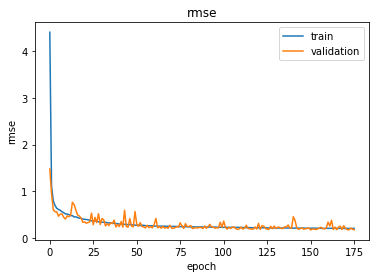

In [16]:
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

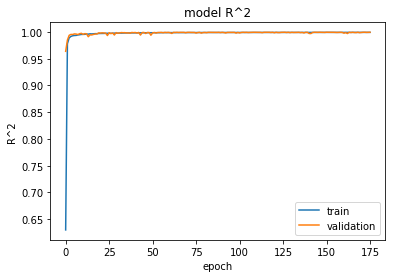

In [17]:
# plot training curve for R^2
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [18]:
import sklearn.metrics as skm, math
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_test,predictions))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_test,predictions))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_test,predictions)))
print("R square (R^2):                 %f" % skm.r2_score(y_test,predictions))



Mean absolute error (MAE):      0.177054
Mean squared error (MSE):       0.099708
Root mean squared error (RMSE): 0.315766
R square (R^2):                 0.999515


## Try dropout

In [19]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(7,)),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model2.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result2 = model2.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation),
                   callbacks = [es]
                  )

W0705 21:27:21.248737 10472 deprecation.py:506] From C:\Users\mayingzh\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Train on 1247590 samples, validate on 311898 samples
Epoch 1/200
1247590/1247590 [==============================] - 8s 6us/step - loss: 65.3871 - rmse: 4.0208 - r_square: 0.6751 - val_loss: 5.0371 - val_rmse: 1.1821 - val_r_square: 0.9752
Epoch 2/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 8.0364 - rmse: 1.4672 - r_square: 0.9596 - val_loss: 1.8562 - val_rmse: 0.7391 - val_r_square: 0.9907
Epoch 3/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 4.6307 - rmse: 1.1076 - r_square: 0.9767 - val_loss: 2.0075 - val_rmse: 0.7295 - val_r_square: 0.9899
Epoch 4/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 3.7413 - rmse: 1.0000 - r_square: 0.9812 - val_loss: 2.2993 - val_rmse: 0.8243 - val_r_square: 0.9887
Epoch 5/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 3.1775 - rmse: 0.9317 - r_square: 0.9839 - val_loss: 1.7080 - val_rmse: 0.7222 - val_r_square: 0.9915
Epoch 6/200
1247590/1

Epoch 45/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 0.7662 - rmse: 0.4876 - r_square: 0.9961 - val_loss: 1.1892 - val_rmse: 0.6234 - val_r_square: 0.9940
Epoch 46/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 0.7385 - rmse: 0.4804 - r_square: 0.9962 - val_loss: 0.9328 - val_rmse: 0.5534 - val_r_square: 0.9953
Epoch 47/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 0.7387 - rmse: 0.4775 - r_square: 0.9962 - val_loss: 1.3995 - val_rmse: 0.6575 - val_r_square: 0.9930
Epoch 48/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 0.7239 - rmse: 0.4755 - r_square: 0.9963 - val_loss: 1.0100 - val_rmse: 0.6035 - val_r_square: 0.9949
Epoch 00048: early stopping


In [20]:
predictions2 = model2.predict(X_test)
print(predictions2[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_test,predictions2))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_test,predictions2))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_test,predictions2)))
print("R square (R^2):                 %f" % skm.r2_score(y_test,predictions2))

[[6.9846809e-02]
 [9.5317960e-02]
 [6.8059593e-01]
 [2.5958467e+00]
 [4.4982195e-02]
 [1.2285782e+01]
 [2.7649044e+01]
 [8.6950426e+00]
 [1.0728182e+01]
 [4.8144070e+01]]


Mean absolute error (MAE):      0.602090
Mean squared error (MSE):       1.004913
Root mean squared error (RMSE): 1.002453
R square (R^2):                 0.995114


## Try batch normalization technique to regularize neurons

In [21]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential([
    BatchNormalization(),
    Dense(64, activation='relu', input_shape=(7,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])
model3.compile(
  optimizer='adam',
  loss='mse',
  metrics=[rmse, r_square],
)
# fit the model
result3 = model3.fit(XX_train, 
                   yy_train,
                   epochs = 200,
                   batch_size=256,
                   validation_data=(XX_validation, yy_validation),
                   callbacks = [es]
                  )

Train on 1247590 samples, validate on 311898 samples
Epoch 1/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 20.2347 - rmse: 1.9044 - r_square: 0.8994 - val_loss: 2.9283 - val_rmse: 0.7770 - val_r_square: 0.9853
Epoch 2/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 6.8119 - rmse: 1.2502 - r_square: 0.9656 - val_loss: 5.2465 - val_rmse: 1.0042 - val_r_square: 0.9737
Epoch 3/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 6.2657 - rmse: 1.1880 - r_square: 0.9682 - val_loss: 2.1644 - val_rmse: 0.7949 - val_r_square: 0.9890
Epoch 4/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 5.8657 - rmse: 1.1516 - r_square: 0.9703 - val_loss: 2.3394 - val_rmse: 0.7156 - val_r_square: 0.9884
Epoch 5/200
1247590/1247590 [==============================] - 7s 6us/step - loss: 5.7647 - rmse: 1.1419 - r_square: 0.9710 - val_loss: 1.8557 - val_rmse: 0.7330 - val_r_square: 0.9905
Epoch 6/200
1247590/1

Epoch 45/200
1247590/1247590 [==============================] - 7s 5us/step - loss: 4.6773 - rmse: 0.9831 - r_square: 0.9763 - val_loss: 1.1762 - val_rmse: 0.5392 - val_r_square: 0.9941
Epoch 46/200
1247590/1247590 [==============================] - 7s 5us/step - loss: 4.6474 - rmse: 0.9798 - r_square: 0.9766 - val_loss: 1.0842 - val_rmse: 0.4909 - val_r_square: 0.9945
Epoch 00046: early stopping


In [22]:
predictions3 = model3.predict(X_test)
print(predictions3[:10])
print("\n")
print("Mean absolute error (MAE):      %f" % skm.mean_absolute_error(y_test,predictions3))
print("Mean squared error (MSE):       %f" % skm.mean_squared_error(y_test,predictions3))
print("Root mean squared error (RMSE): %f" % math.sqrt(skm.mean_squared_error(y_test,predictions3)))
print("R square (R^2):                 %f" % skm.r2_score(y_test,predictions3))

[[-0.05163175]
 [ 0.11092597]
 [ 1.0757746 ]
 [ 1.625279  ]
 [ 0.13878578]
 [13.080181  ]
 [32.02581   ]
 [ 9.127215  ]
 [10.870003  ]
 [46.180584  ]]


Mean absolute error (MAE):      0.490583
Mean squared error (MSE):       1.087603
Root mean squared error (RMSE): 1.042882
R square (R^2):                 0.994712


## Reference: 
&emsp;&emsp;What does 'Accuracy' mean in Regression? https://github.com/keras-team/keras/issues/7947 <br>
&emsp;&emsp;https://keras.io/metrics/<br>
&emsp;&emsp;Scale, Standardize, or Normalize with Scikit-Learn https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 <br>
&emsp;&emsp;The Day my Computer Won the Nobel Prize (Neural Network Option Pricing)  https://medium.com/datadriveninvestor/the-day-my-computer-won-the-nobel-prize-neural-network-option-pricing-d29b4379f1d2 <br>